<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Alejandro Michel Marrón

**Fecha:** 06 de octubre del 2020.

**Expediente** : IF719889
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Github:** https://github.com/HKael/Tarea4Clases9_10_AMichel_GIMontoya
    
# Tarea 4: Clases 9 y 10
    

## Parte Clase 9

In [50]:
#Import library
from IPython.display import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize
import random
from functools import reduce
from scipy.stats import binom
from scipy.stats import mode

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

In [3]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [4]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()


> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>



### Ejercicio 1

> Alejandro Michel

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ 
$$y=\frac{2}{\pi}\sin^{-1}(\sqrt x)  \longrightarrow  \sin^{2}(y\pi/2)=x,\quad 0\leq x\leq 1 $$
$$f(x) = \frac{1}{\pi \sqrt {1-x} \sqrt x} $$

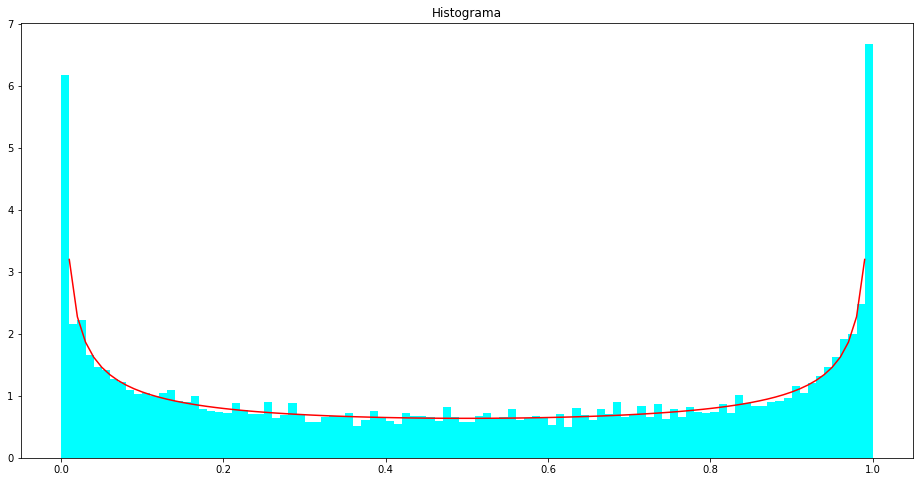

In [53]:
N = 10000
plt.figure(figsize=[16,8])
#Función de histograma
x1 = np.random.sample(N)
fx1 = np.sin(np.pi/2 * x1)**2
plt.hist(fx1, 100, density = True, color = "cyan")


#Curva
x2 = np.arange(0.01,1, 0.01)
fx2 = 1/(np.pi * np.sqrt(1-x2) * np.sqrt(x2))
plt.plot(x2,fx2, color = "r")

plt.title('Histograma')
plt.show()

> Gabriela Montoya

### Ejercicio 2

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

> Alejandro Michel


$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}\hspace{1cm} $$

$$p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1} \hspace{1cm} (2)$$


$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i = \frac{n-i}{i+1}\frac{p}{1-p}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$ 


$$p_{i+1}=\frac{n-i}{i+1}\frac{n!}{i!(n-i)!}p^{i+1}(1-p)^{n-i-1}$$ 

Se simplifican los factoriales de la siguiente forma $(i+1)(i!) = (i+1)!$ y a su vez $(n-i)/(n-i)! = 1/(n-i-1)!$ 

$$ p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$

Es identica a la segunda ecuación, mostrando la validez de ecuación inicial.

En la metodología mostrada anteriormente para comprobar la ecuación

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

El cálculo usando esta ecuación es mucho más simple, lo cual lo vuelve más eficientea. Esto reduce la carga computacional y disminuye la cantidad de recursos necesarios.

> Gabriela Montoya

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

> Alejandro Michel

Tenemos dos ecuaciones conocidas

$$p_k=\frac{e^{-\lambda}(\lambda)^k}{k!}\hspace{1cm} )$$

$$p_{k+1}=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!} \hspace{1cm}$$

Sustituimos las varaibles $i$ de la primera ecuación por $(i+1)$. De esta forma, la segunda toma una forma recursiva, es decir, para $p_k$, se separan exponentes y factoriales.

$$p_{k+1} = \frac{e^{-\lambda}(\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$

Nos queda, de forma recursiva...

$$ p_{k+1} = \frac{\lambda}{k+1} p_{k} $$

In [15]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

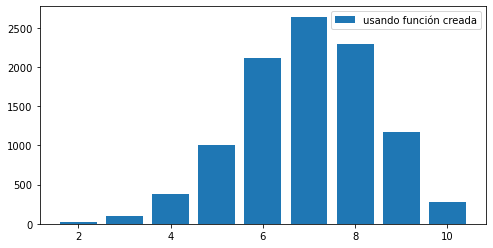

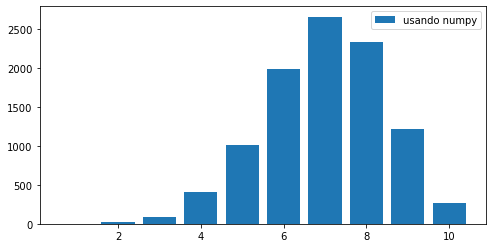

In [16]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

> Gabriela Montoya

## Parte Clase 10

### Ejercicio 1

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


> Alejandro Michel

In [28]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()


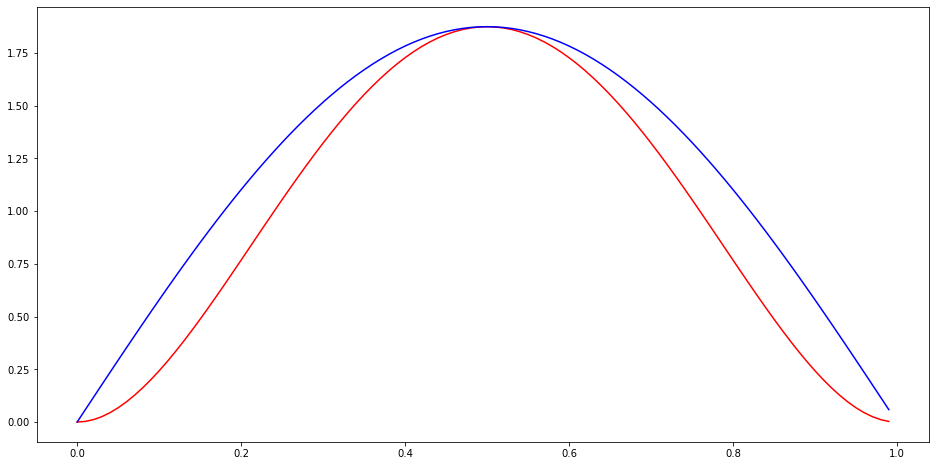

In [29]:
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
c = f(optimize.fmin(lambda x: -f(x), 0, disp=False))
t = lambda x: c * np.sin(np.pi * x)
x = np.arange(0, 1, 0.01)

plt.figure(figsize=[16,8])
plt.plot(x, f(x), label='f(x)', color = 'red')
plt.plot(x, t(x), label='t(x)', color = 'blue')
plt.legend
plt.show() 

> Gabriela Montoya

### Ejercicio 2

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


> Alejandro Michel


$$ f(x) = a \sin(\pi x), \quad -a\leq y\leq a $$

En el método de Aceptación-Rechazo, $f(x)$ debe integrarse en el intervalo (0,1) :


$$ \int_{0}^{1} a \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$$


Esto nos da 

$$z = \int_{0}^{1} a \sin(\pi x) dx = \frac{2a}{\pi}$$

insertamos en $g(x)$ y terminamos con... 

$$g(x) = \frac{t(x)}{z} = \frac{\pi \sin(\pi x)}{2}$$

$$g(x)  = \frac{\pi \sin(\pi x)}{2}$$

> Gabriela Montoya

### Ejercicio 3

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


> Alejandro Michel

$$g(x) = \frac{\pi \sin(\pi x)}{2} $$
$$K = \frac{\pi \sin(\pi x)}{2} $$
$$ \frac{2 K}{\pi} = \sin(\pi x) \longrightarrow \arccos(\frac{2 K}{\pi}) = \pi x $$
finalmente resulta que
$$ x = \frac{\arccos(\frac{2 P}{\pi})}{\pi} , [\frac{-\pi}{2},\frac{\pi}{2}] $$

In [38]:
def distG(a,N):
    return (1/np.pi)* np.arccos((2* np.random.uniform(-np.pi/2, np.pi/2,N))/np.pi)

> Gabriela Montoya

### Ejercicio 4

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:


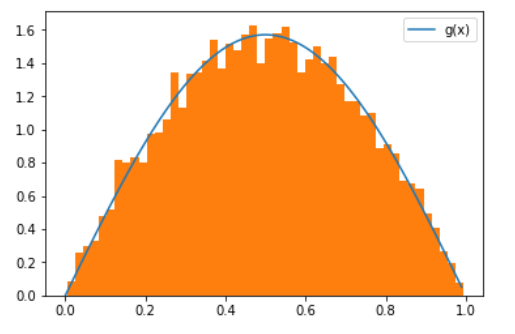

In [4]:
Image(filename = "IMG1.png")

> Alejandro Michel

Punto maximo:  [1.875]


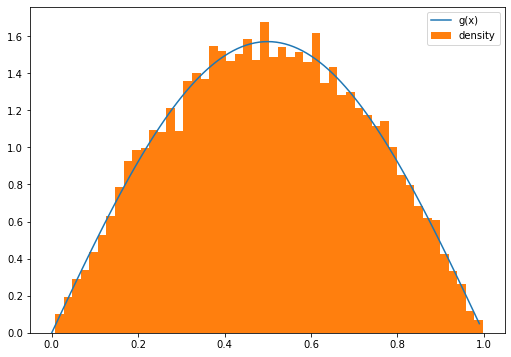

In [44]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = distG(a,N)
print("Punto maximo: ", a)
plt.figure(figsize=[8.5,6])
plt.plot(x,g(x),label='g(x)')
plt.hist(R1,bins = 50, density = True, label='density')
plt.legend()

plt.show()


> Gabriela Montoya

### Ejercicio 5

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:


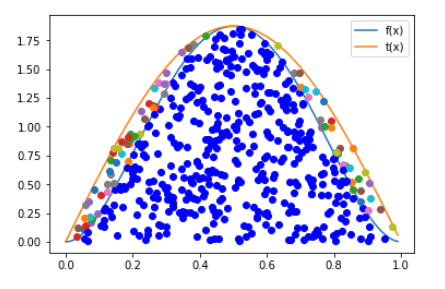

In [7]:
Image(filename = "IMG2.png")

> Alejandro Michel

Punto maximo:  [1.875]


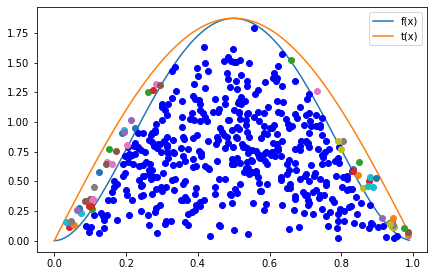

In [46]:
N = 500
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))

t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
print("Punto maximo: ", a)

plt.figure(figsize=[7,4.5])
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = distG(a,N)
R2 = distG(a,N)
Acep_rechazo(R2,R1,f,t)

> Gabriela Montoya

### Ejercicio 6

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

> Alejandro Michel

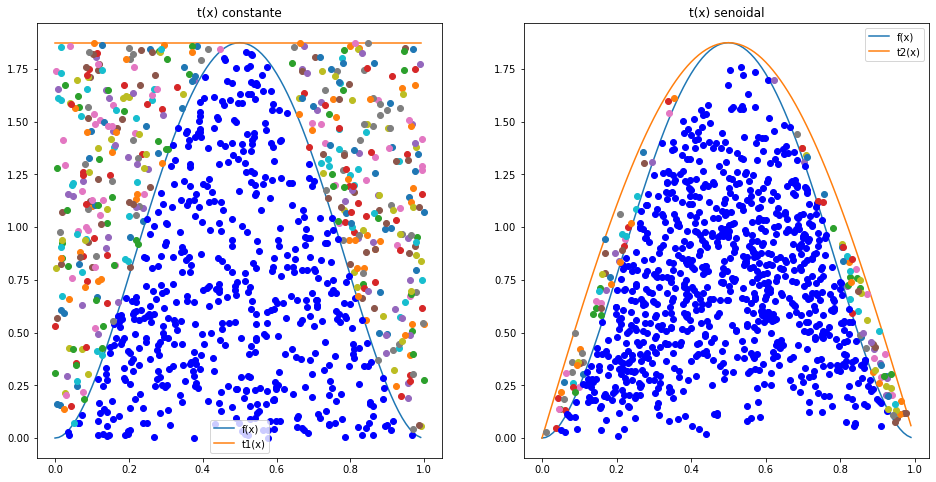

Porcentaje de puntos aceptados en t(x) constante es: 0.526
Porcentaje de puntos aceptados en t(x) senoidal es: 0.87


In [69]:
N = 1000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))

t1 = lambda x: a*np.ones(len(x))
t2 = lambda x: a*np.sin(np.pi*x)

x = np.arange(0,1,0.01)
plt.figure(figsize=(16,8))


#Plot 1
plt.subplot(1,2,1)
plt.title('t(x) constante')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t1(x),label='t1(x)')
plt.legend()
R1 = np.random.rand(N)
R2 = np.random.rand(N)
f_x = f(R1)
t1_x = t1(R1)
condicion = np.multiply(R2,t1_x) <= f_x
p1 = 0
p2 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R1[i],R2[i]*t1_x[i],'ob')
        p1 += 1
    else:
        plt.plot(R1[i],R2[i]*t1_x[i],'o')
        p2 += 1

# Plot 2
plt.subplot(1,2,2)   
plt.title('t(x) senoidal')
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t2(x),label='t2(x)')
plt.legend()
R3 = distribucion1(a,N)
R4 = distribucion1(a,N)
f_x = f(R3)
t2_x = t2(R3)
condicion = np.multiply(R4,t2_x) <= f_x
p3 = 0
p4 = 0
for i in range(N):
    if condicion[i]:
        plt.plot(R3[i],R4[i]*t2_x[i],'ob')
        p3 += 1
    else:
        plt.plot(R3[i],R4[i]*t2_x[i],'o')
        p4+= 1
        

plt.show()

print('Porcentaje de puntos aceptados en t(x) constante es:', p1/N)

print('Porcentaje de puntos aceptados en t(x) senoidal es:', p3/N)


> Gabriela Montoya

### Ejercicio 7

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

> Alejandro Michel

El máximo de f es: [2.109375]


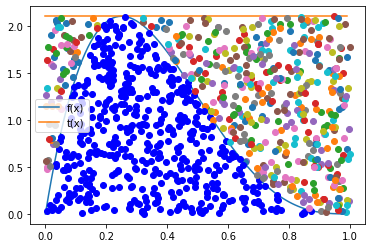

In [49]:
 
f = lambda x: 20*x*((1-x)**3)

a = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t = lambda x: max_f*np.ones(len(x)) 
x = np.arange(0,1,0.01)  
print('El máximo de f es:', a)

# Plot
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R2,R1,f,t)

> Gabriela Montoya